In [2]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style('chesterish')
# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [3]:
# Again seaborn comes with a great dataset to play and learn with
flight_dframe = sns.load_dataset('flights')

In [4]:
#Preview
flight_dframe.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [15]:
# Let's pivot this dataframe do its easier to manage
flight_dframe = flight_dframe.pivot("passengers","month", "year")
#Show
flight_dframe

KeyError: 'passengers'

<AxesSubplot:xlabel='year', ylabel='month'>

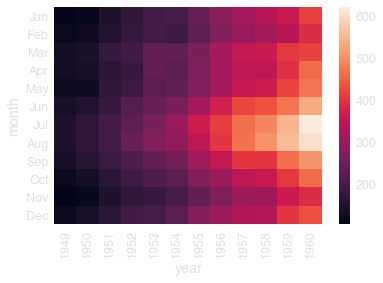

In [16]:
# This dataset is now in a clear format to be dispalyed as a heatmap
sns.heatmap(flight_dframe)

<AxesSubplot:xlabel='year', ylabel='month'>

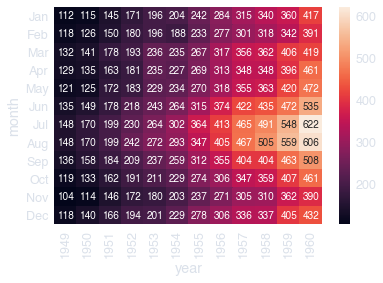

In [17]:

# We also have the option to annotate each cell
sns.heatmap(flight_dframe,annot=True,fmt='d')

<AxesSubplot:xlabel='year', ylabel='month'>

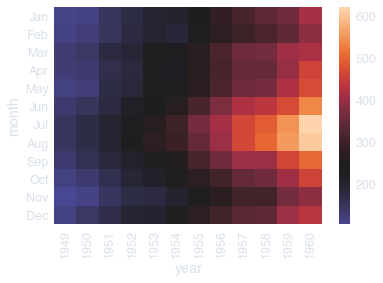

In [20]:

# We can choose our own 'center' for our colormap
sns.heatmap(flight_dframe,center=flight_dframe.loc['Jan',1955])

<AxesSubplot:xlabel='year', ylabel='month'>

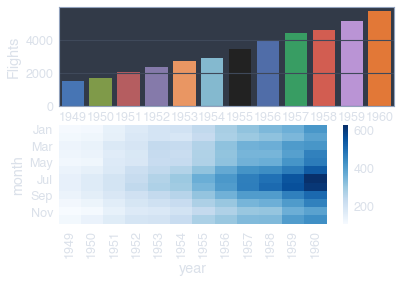

In [37]:

# heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()
# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

# Create the bar plot on top
sns.barplot(x='Year',y='Flights',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={"orientation": "vertical"})

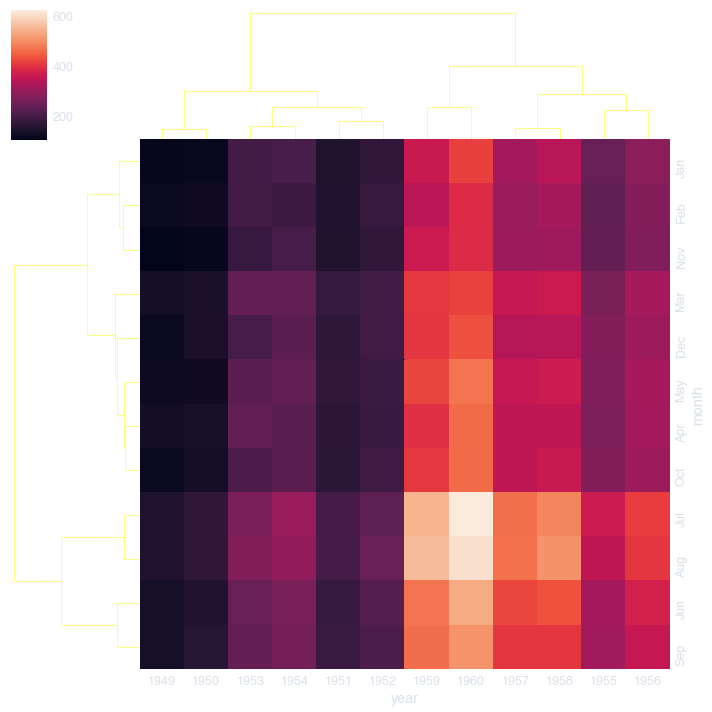

In [43]:

# Finally we'll learn about using a clustermap

# Clustermap will reformat the heatmap so similar rows are next to each other
sns.clustermap(flight_dframe,
              tree_kws={'color': "yellow"})

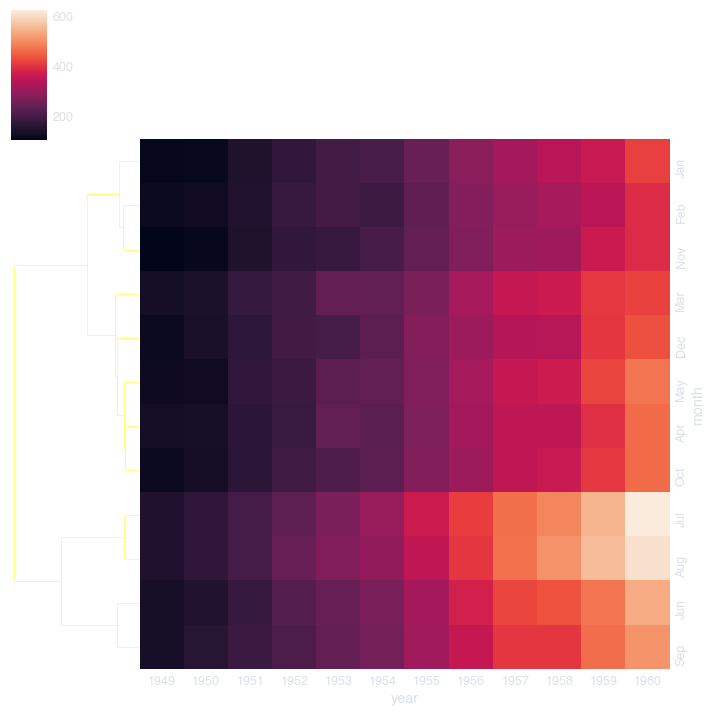

In [42]:
# Let's uncluster the columns
sns.clustermap(flight_dframe,col_cluster=False,
              tree_kws={'color': "yellow"})

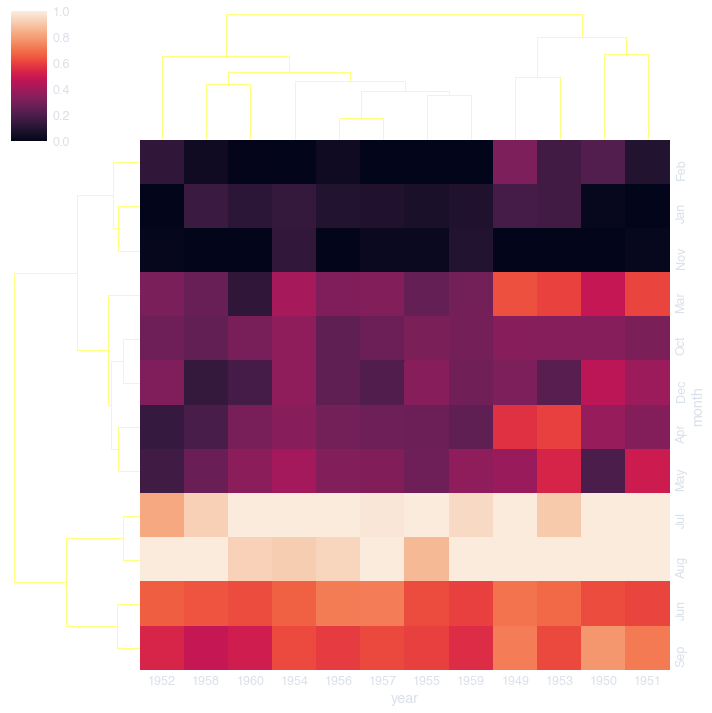

In [41]:
# Since the number of flights increase every year, we should set a standard scale
sns.clustermap(flight_dframe,standard_scale=1,
              tree_kws={'color': "yellow"}) # standardize by columns (year)

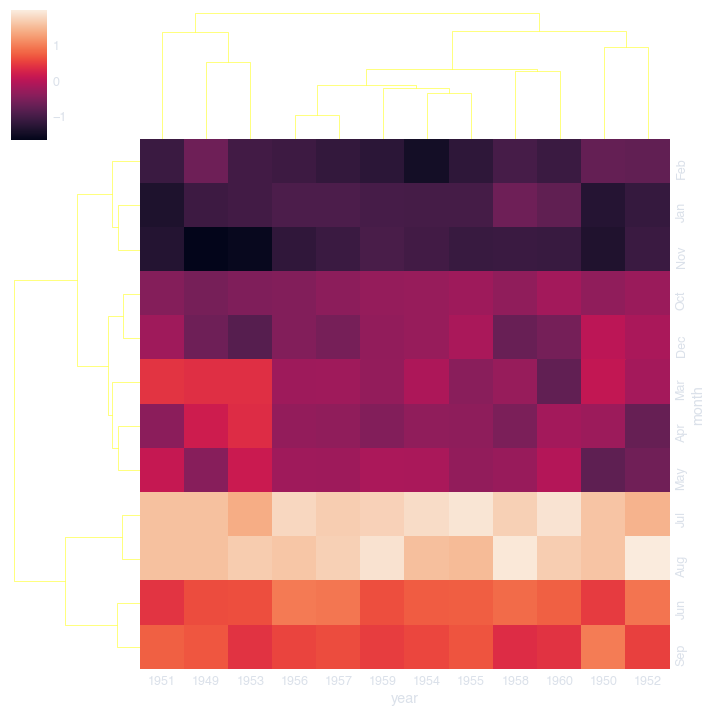

In [44]:

# Finally we can also normalize the rows by their Z-score.
# This subtracts the mean and devides by the STD of each column, then teh rows have amean of 0 and a variance of 1
sns.clustermap(flight_dframe,z_score=1,
              tree_kws={'color':'yellow'})